### Exercise for k means tutorial
1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [2]:
import pandas as pd 
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df = df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns')
df.head(2)

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0


Text(0, 0.5, 'Petal Width')

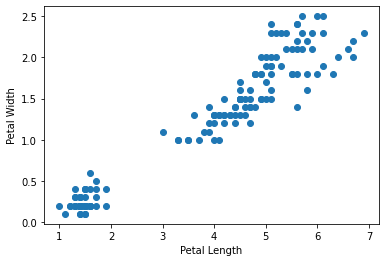

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),target,cluster
0,1.4,0.2,0,2
1,1.4,0.2,0,2
2,1.3,0.2,0,2
3,1.5,0.2,0,2
4,1.4,0.2,0,2


In [17]:
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [5.59583333, 2.0375    ],
       [1.462     , 0.246     ]])

Text(0, 0.5, 'Petal Width')

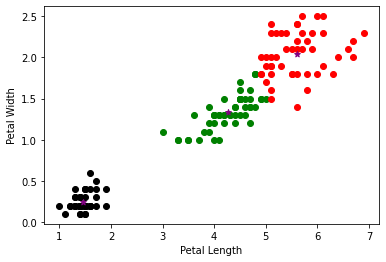

In [18]:
# Cluster formed
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Petal Width')

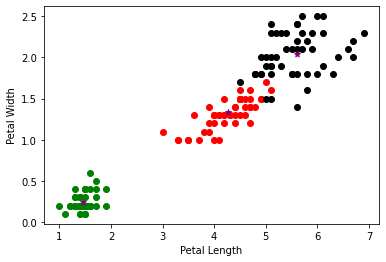

In [19]:
# Target Values
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [20]:
# Elbow Method
sse = []
k_range = range(1,10)
for k in k_range:
    km_model = KMeans(n_clusters=k)
    km_model.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km_model.inertia_)

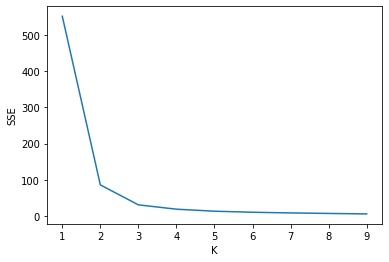

In [21]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range,sse)